# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#Hypothesis Generation

Using the BigMart data we have to build a predictive Model that will find out the sales of each product at a particular store. 

#Importing libraries 

In [ ]:
#Added libraries that help us work on the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Collection & Analysis

In [ ]:
#Reading the csv file using pandas library
from google.colab import files
uploaded = files.upload()


In [ ]:
#Shows the first five rows of the entire dataset
superMart.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Shows number of rows and columns
superMart.shape

(8523, 12)

In [ ]:
#Shows datatypes and nonull count
superMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Handling Missing Values

In [ ]:
#Shows the number of missing values in each column
#We recognize that there is are two columns with missing values
superMart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#For numerical values we use mean to fil the missing values
superMart['Item_Weight']=superMart['Item_Weight'].fillna(superMart['Item_Weight'].mean())
testData['Item_Weight']=testData['Item_Weight'].fillna(testData['Item_Weight'].mean())


In [ ]:
#For textual values we use mode to fil the missing values
mode_value=superMart.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
test_mode_value=testData.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))


In [ ]:
print(mode_value)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values=superMart['Outlet_Size'].isnull()
test_missing_values=testData['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
superMart.loc[missing_values,'Outlet_Size']=superMart.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_value[x])


In [ ]:
testData.loc[test_missing_values,'Outlet_Size']=testData.loc[test_missing_values,'Outlet_Type'].apply(lambda x:test_mode_value[x])

In [ ]:
testData.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Exploratory Data Analysis

Univariate Analysis


In [ ]:
#Shows the numerical vlaues in the dataset
superMart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

<Figure size 432x432 with 0 Axes>

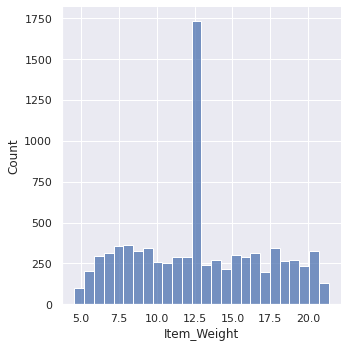

In [ ]:
#Item Weight Distribution using Distplot
plt.figure(figsize=(6,6))
sns.displot(superMart['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

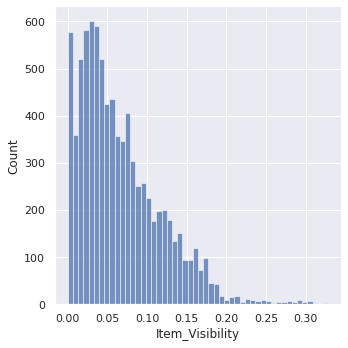

In [ ]:
#Item Visibility using Distplot
plt.figure(figsize=(6,6))
sns.displot(superMart['Item_Visibility'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


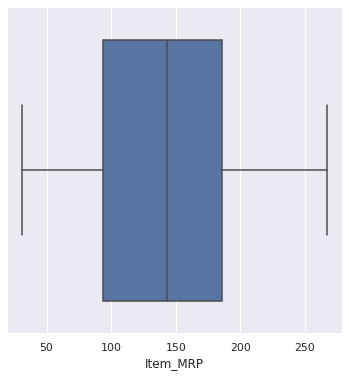

In [ ]:
#Item MRP using Box Plot
plt.figure(figsize=(6,6))
sns.boxplot(superMart['Item_MRP'])
plt.show()

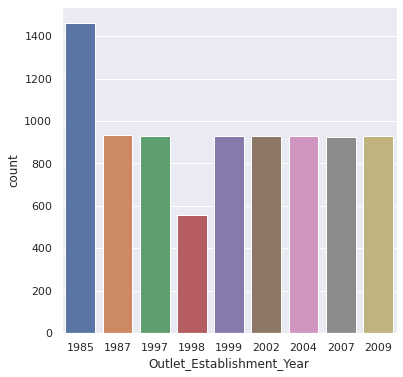

In [ ]:
#Outlet Establishment Year using Countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=superMart)
plt.show()

<Figure size 432x432 with 0 Axes>

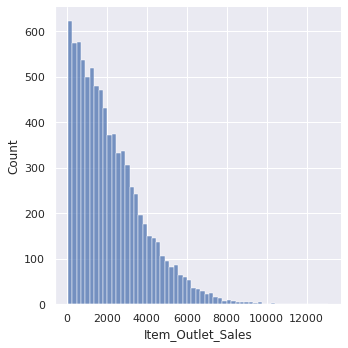

In [ ]:

#Item Outlet Sales using Distplot
plt.figure(figsize=(6,6))
sns.displot(superMart['Item_Outlet_Sales'])
plt.show()

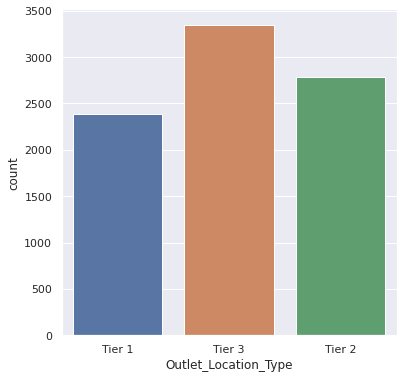

In [ ]:
#Outlet Location Type using Countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=superMart)
plt.show()


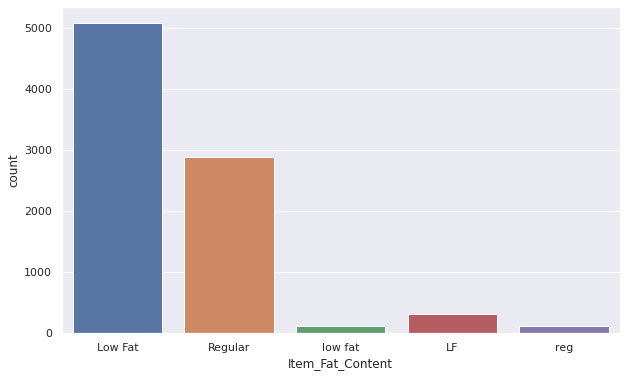

In [ ]:
#Item Fat Content using Countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content',data=superMart)
plt.show()


Bivariate Analysis

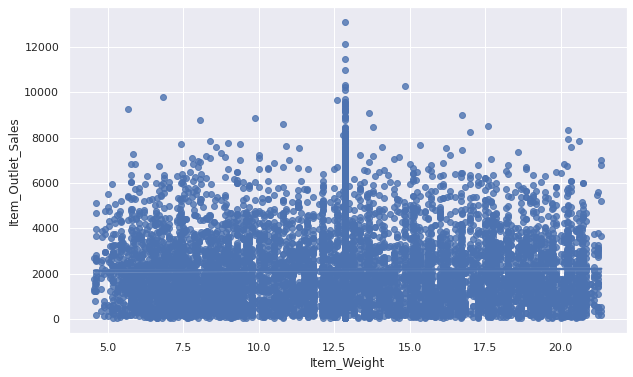

In [ ]:
#Item Weight & Item Outlet Sales using Regplot
plt.figure(figsize=(10,6))
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=superMart)
plt.show()


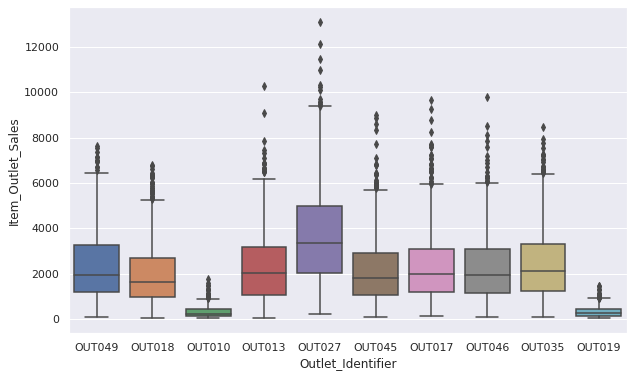

In [ ]:
#Outlet Identifier & Item Outlet Sales using Regplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=superMart)
plt.show()


#Feature Engineering

In [ ]:
#Shows the count per category
superMart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Merging the categories that are same
superMart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
testData.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
#Checking after merging
superMart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#Encoding

Label encoding

In [ ]:
superMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Assigning vairable
encoder = LabelEncoder()

In [ ]:
#Converting textual values to numerical values
superMart['Item_Identifier']=encoder.fit_transform(superMart['Item_Identifier'])
testData['Item_Identifier']=encoder.fit_transform(testData['Item_Identifier'])

superMart['Item_Fat_Content']=encoder.fit_transform(superMart['Item_Fat_Content'])
testData['Item_Fat_Content']=encoder.fit_transform(testData['Item_Fat_Content'])

superMart['Item_Type']=encoder.fit_transform(superMart['Item_Type'])
testData['Item_Type']=encoder.fit_transform(testData['Item_Type'])

superMart['Outlet_Identifier']=encoder.fit_transform(superMart['Outlet_Identifier'])
testData['Outlet_Identifier']=encoder.fit_transform(testData['Outlet_Identifier'])

superMart['Outlet_Size']=encoder.fit_transform(superMart['Outlet_Size'])
testData['Outlet_Size']=encoder.fit_transform(testData['Outlet_Size'])

superMart['Outlet_Location_Type']=encoder.fit_transform(superMart['Outlet_Location_Type'])
testData['Outlet_Location_Type']=encoder.fit_transform(testData['Outlet_Location_Type'])

superMart['Outlet_Type']=encoder.fit_transform(superMart['Outlet_Type'])
testData['Outlet_Type']=encoder.fit_transform(testData['Outlet_Type'])

In [ ]:
superMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#Splitting Data into X and Y variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

In [ ]:
#Splitting the data into target and features
x=superMart.drop(columns='Item_Outlet_Sales',axis=1)
y=superMart['Item_Outlet_Sales']

In [ ]:
#Variables for modeling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#Machine Learning Training Models

**Linear Regression Model**


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted=LR.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
LRScore=r2_score(y_test,predicted)


In [ ]:
print("LR Score: ",LRScore)

LR Score:  0.47597773337573046


**ADA Boost Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abr=AdaBoostRegressor(n_estimators=70)

In [ ]:
abr.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=70)

In [ ]:
predicted=abr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
ADAScore=r2_score(y_test,predicted)

In [ ]:
print("ADA SCORE",ADAScore)

ADA SCORE 0.5213452132463067


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg=RandomForestRegressor()

In [ ]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
predicted=rfg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
RFRScore=r2_score(y_test,predicted)

In [ ]:
print("RFR SCORE: ",RFRScore)

RFR SCORE:  0.5211424918218988


**XGBoost Model**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
predicted=xgb.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
XGBScore=r2_score(y_test,predicted)

In [ ]:
print("XGB SCORE: ",XGBScore)

XGB SCORE:  0.5697310651260885


#Summary

First we studied the Big Mart Sales Data and tried to understand all the features of the data. After which we performed Exploratory Data Analysis(Univariate & Bivariate Analysis) by plotting graphs and building relations. After which we treated the missing values and applied Feature Engieening as well. Then we moved our awy towards encoding and converted textual data to numerical data so that we can apply train our machine learning models. Which in turn helped us to predict the Outlet_Sales.

#Results

From the different Machine Learning Models we applied, we found the following results: 

- LR Score:  0.48
- ADA Score: 0.52
- RFR SCORE:  0.52
- XGB SCORE:  0.57

The results show us that XGBBoost performed the best out of all the models. 


#Results

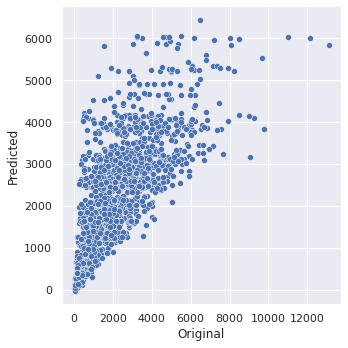

In [ ]:
#Plotting the results (Original VS Predicted)
predictedData=pd.DataFrame({'Original': y_test, 'Predicted': predicted})
sns.relplot(x='Original', y='Predicted',data=predictedData,)